# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
#Import all the required libraries
import os
import pandas as pd
import numpy as np
import random


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import mnist
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import time
import glob
from PIL import Image
import collections
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


Using TensorFlow backend.


Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create word-to-index and index-to-word mappings.

4.Create a dataframe which summarizes the image, path & captions as a dataframe

5.Visualise the top 30 occuring words in the captions

6.Create a list which contains all the captions & path


In [2]:
#Import the dataset and read the image into a seperate variable

images='Flickr8K/Images/'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


Flickr8K/Images/3702038926_966fdaa311.jpg


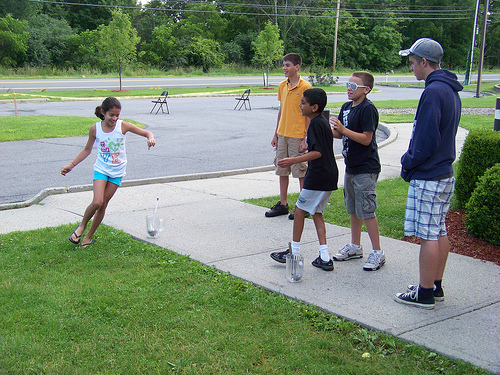

In [3]:
#Visualise both the images & text present in the dataset
print(all_imgs[67])
Image.open(all_imgs[67])

In [4]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    
    text = open(filename,"r").readlines()
    
    return text

doc = load_doc('Flickr8K/captions.txt')
print(doc[:300])

['image,caption\n', '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .\n', '1000268201_693b08cb0e.jpg,A girl going into a wooden building .\n', '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .\n', '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .\n', '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .\n', '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting\n', '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .\n', '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .\n', '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .\n', '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .\n', '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted

Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [5]:
all_img_id= [line.split(',',1)[0] for line in doc[1:]]
all_img_vector= [images+id for id in all_img_id]
annotations= [line.split(',',1)[1] for line in doc[1:]]

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,Flickr8K/Images/1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,Flickr8K/Images/1000268201_693b08cb0e.jpg,A girl going into a wooden building .\n
2,1000268201_693b08cb0e.jpg,Flickr8K/Images/1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse...
3,1000268201_693b08cb0e.jpg,Flickr8K/Images/1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,Flickr8K/Images/1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,Flickr8K/Images/1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting\n
6,1001773457_577c3a7d70.jpg,Flickr8K/Images/1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,Flickr8K/Images/1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Flickr8K/Images/1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Flickr8K/Images/1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .\n


Flickr8K/Images/1019077836_6fc9b15408.jpg
A brown dog running on a lawn near a garden hose



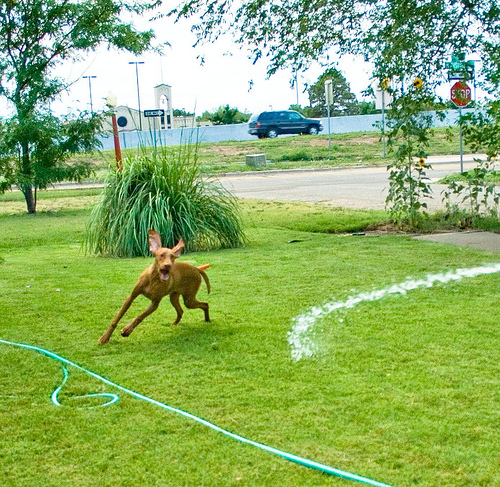

In [6]:
# Visualise Image with caption
print(df.Path[67])
print(df.Captions[67])
Image.open(df.Path[67])

In [7]:
#Create the vocabulary & the counter for the captions

vocabulary= [word for caption in df.Captions for word in caption.split(" ")]

val_count=Counter(vocabulary)
val_count

Counter({'A': 21480,
         'child': 1475,
         'in': 18959,
         'a': 40267,
         'pink': 734,
         'dress': 341,
         'is': 9345,
         'climbing': 497,
         'up': 1251,
         'set': 103,
         'of': 6711,
         'stairs': 103,
         'an': 1944,
         'entry': 1,
         'way': 50,
         '.\n': 34192,
         'girl': 3212,
         'going': 149,
         'into': 1073,
         'wooden': 284,
         'building': 485,
         'little': 1625,
         'playhouse': 4,
         'the': 15327,
         'to': 3172,
         'her': 1163,
         'cabin': 4,
         'black': 3693,
         'dog': 7947,
         'and': 8850,
         'spotted': 37,
         'are': 3503,
         'fighting\n': 2,
         'tri-colored': 14,
         'playing': 2000,
         'with': 7760,
         'each': 430,
         'other': 755,
         'on': 10710,
         'road': 360,
         'white': 3874,
         'brown': 2475,
         'spots': 29,
         'starin

In [8]:
#Visualise the top 30 occuring words in the captions
val_count.most_common(30)

[('a', 40267),
 ('.\n', 34192),
 ('A', 21480),
 ('in', 18959),
 ('the', 15327),
 ('on', 10710),
 ('is', 9345),
 ('and', 8850),
 ('dog', 7947),
 ('with', 7760),
 ('man', 6820),
 ('of', 6711),
 ('Two', 3962),
 ('white', 3874),
 ('black', 3693),
 ('are', 3503),
 ('boy', 3440),
 ('woman', 3223),
 ('girl', 3212),
 (',', 3210),
 ('to', 3172),
 ('wearing', 3061),
 ('The', 2920),
 ('at', 2904),
 ('red', 2660),
 ('water', 2646),
 ('brown', 2475),
 ('people', 2437),
 ('young', 2431),
 ('."\n', 2365)]

In [9]:
#Create a list which contains all the captions
annotations=[line.split(',',1)[1] for line in doc[1:]]

#add the <start> & <end> token to all those captions as well
annotations = ['<start> ' + caption + ' <end>' for caption in annotations]

#Create a list which contains all the path to the images
all_img_path=[images+id for id in all_img_id]

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [10]:
# create the tokenizer
top_k = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(annotations)
#your code here

In [11]:
# Create word-to-index and index-to-word mappings.
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

tokenizer.word_index[tokenizer.oov_token] = tokenizer.num_words + 1
tokenizer.index_word[tokenizer.num_words + 1] = tokenizer.oov_token
#your code here

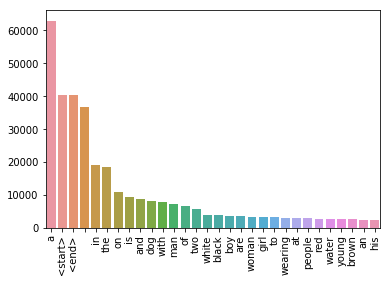

In [12]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing
top_30 = sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True)[:30]
sns.barplot([x[0] for x in top_30],[x[1] for x in top_30])
plt.xticks(rotation=90)
plt.show()   

In [13]:
# Pad each vector to the max_length of the captions ^ store it to a vairable
train_seqs = tokenizer.texts_to_sequences(annotations)
max_length = max([len(s) for s in train_seqs])
cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs,padding='post',maxlen=max_length)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 40)


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

In [14]:
def resize_image(image_path):
    my_img = tf.io.read_file(image_path)
    my_img = tf.image.decode_jpeg(my_img, channels=3)
    my_img = tf.image.resize(my_img, (299, 299))
    my_img = tf.keras.applications.inception_v3.preprocess_input(my_img)
    return my_img,image_path

In [15]:
BATCH_SIZE = 64

image_dataset = tf.data.Dataset.from_tensor_slices(all_img_vector)
image_dataset = image_dataset.map(
  resize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)

## Create the train & test data 
1.Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [16]:
image_train, image_test, caption_train, caption_test = train_test_split(all_img_vector,
                                                                        cap_vector,
                                                                        test_size=0.2,
                                                                        random_state=42)

In [17]:
print("Training data for images: " + str(len(image_train)))
print("Testing data for images: " + str(len(image_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of thei mage using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [18]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = keras.Model(new_input, hidden_layer)

In [19]:
# write your code to extract features from each image in the dataset
img_feature = {}
for image,path in image_dataset:
    batch_features = image_features_extract_model(image)
    batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
    for batch_f, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        img_feature[path_of_feature] =  batch_f.numpy()

In [20]:
def map_function(image_name,capt):
    image_tensor = img_feature[image_name.decode('utf-8')]
    return image_tensor,capt

In [21]:
BUFFER_SIZE = 1000
def generate_dataset(images_data, captions_data):
    
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))
    dataset = dataset.shuffle(BUFFER_SIZE)

    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_function, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)


    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [22]:
train_dataset=generate_dataset(image_train,caption_train)
test_dataset=generate_dataset(image_test,caption_test)

In [23]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,40)

(64, 64, 2048)
(64, 40)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [24]:
embedding_dim = 256 
units = 512
vocab_size = 5002 #top 5,000 words +1
train_num_steps = len(image_train)//BATCH_SIZE #len(total train images) // BATCH_SIZE
test_num_steps = len(image_test)//BATCH_SIZE #len(total test images) // BATCH_SIZE

### Encoder

In [25]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = layers.Dense(embed_dim) #build your Dense layer with relu activation
        self.dropout = layers.Dropout(0.5)
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.nn.relu(features)
        return features

In [26]:
encoder=Encoder(embedding_dim)

### Attention model

In [27]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = layers.Dense(units) #build your Dense layer
        self.W2 = layers.Dense(units) #build your Dense layer
        self.V = layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1) # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score = keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis)) # build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights = keras.activations.softmax(self.V(score), axis=1) # extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector = attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1) # reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

### Decoder

In [28]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = layers.Dense(self.units) #build your Dense layer
        self.d2 = layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed =  self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed =  tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [29]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [30]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5002)
Attention weights shape from Decoder: (64, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [31]:
optimizer = keras.optimizers.Adam() #define the optimizer
loss_object = keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none') #define your loss object

In [32]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [33]:
checkpoint_path = "Flickr8K/checkpoint"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [34]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [35]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        features = encoder(img_tensor)
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)
        avg_loss = (loss/int(target.shape[1]))
        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))
        
    return loss, avg_loss

In [36]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    #write your code here to do the testing steps
    with tf.GradientTape() as tape:
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)

        avg_loss = (loss / int(target.shape[1]))

        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))
        
    return loss, avg_loss

In [37]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
    avg_test_loss=total_loss/test_num_steps
    
    return avg_test_loss

In [38]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  7%|▋         | 1/15 [03:29<48:52, 209.43s/it]

For epoch: 1, the train loss is 1.234, & test loss is 1.021
Time taken for 1 epoch 209.31708908081055 sec

Test loss has been reduced from 100.000 to 1.021


 13%|█▎        | 2/15 [05:03<37:53, 174.88s/it]

For epoch: 2, the train loss is 0.943, & test loss is 0.903
Time taken for 1 epoch 94.15836644172668 sec

Test loss has been reduced from 1.021 to 0.903


 20%|██        | 3/15 [06:37<30:07, 150.64s/it]

For epoch: 3, the train loss is 0.859, & test loss is 0.835
Time taken for 1 epoch 93.95128297805786 sec

Test loss has been reduced from 0.903 to 0.835


 27%|██▋       | 4/15 [08:11<24:30, 133.68s/it]

For epoch: 4, the train loss is 0.801, & test loss is 0.785
Time taken for 1 epoch 93.99437403678894 sec

Test loss has been reduced from 0.835 to 0.785


 33%|███▎      | 5/15 [09:45<20:17, 121.77s/it]

For epoch: 5, the train loss is 0.755, & test loss is 0.742
Time taken for 1 epoch 93.87709188461304 sec

Test loss has been reduced from 0.785 to 0.742


 40%|████      | 6/15 [11:19<17:00, 113.41s/it]

For epoch: 6, the train loss is 0.714, & test loss is 0.703
Time taken for 1 epoch 93.78796792030334 sec

Test loss has been reduced from 0.742 to 0.703


 47%|████▋     | 7/15 [12:53<14:20, 107.62s/it]

For epoch: 7, the train loss is 0.680, & test loss is 0.670
Time taken for 1 epoch 93.98110342025757 sec

Test loss has been reduced from 0.703 to 0.670


 53%|█████▎    | 8/15 [14:27<12:04, 103.56s/it]

For epoch: 8, the train loss is 0.647, & test loss is 0.637
Time taken for 1 epoch 93.96650862693787 sec

Test loss has been reduced from 0.670 to 0.637


 60%|██████    | 9/15 [16:01<10:04, 100.67s/it]

For epoch: 9, the train loss is 0.617, & test loss is 0.607
Time taken for 1 epoch 93.82433819770813 sec

Test loss has been reduced from 0.637 to 0.607


 67%|██████▋   | 10/15 [17:35<08:13, 98.66s/it]

For epoch: 10, the train loss is 0.589, & test loss is 0.581
Time taken for 1 epoch 93.84850144386292 sec

Test loss has been reduced from 0.607 to 0.581


 73%|███████▎  | 11/15 [19:09<06:29, 97.28s/it]

For epoch: 11, the train loss is 0.561, & test loss is 0.554
Time taken for 1 epoch 93.9509072303772 sec

Test loss has been reduced from 0.581 to 0.554


 80%|████████  | 12/15 [20:43<04:48, 96.30s/it]

For epoch: 12, the train loss is 0.538, & test loss is 0.530
Time taken for 1 epoch 93.88475704193115 sec

Test loss has been reduced from 0.554 to 0.530


 87%|████████▋ | 13/15 [22:17<03:11, 95.59s/it]

For epoch: 13, the train loss is 0.513, & test loss is 0.508
Time taken for 1 epoch 93.83425426483154 sec

Test loss has been reduced from 0.530 to 0.508


 93%|█████████▎| 14/15 [23:51<01:35, 95.11s/it]

For epoch: 14, the train loss is 0.493, & test loss is 0.487
Time taken for 1 epoch 93.86994171142578 sec

Test loss has been reduced from 0.508 to 0.487


100%|██████████| 15/15 [25:25<00:00, 94.78s/it]

For epoch: 15, the train loss is 0.472, & test loss is 0.467
Time taken for 1 epoch 93.90142464637756 sec

Test loss has been reduced from 0.487 to 0.467


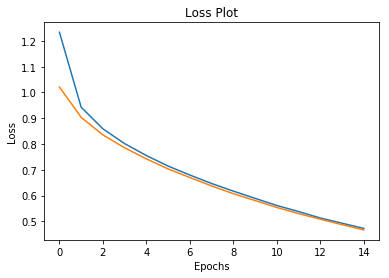

In [39]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [40]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(resize_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val) # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() #extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id]) 
        #map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


### Beam Search(optional)

In [42]:
# def beam_evaluate(image, beam_index = #your value for beam index):

#     #write your code to evaluate the result using beam search
                  
#     return final_caption



In [43]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [44]:
from nltk.translate.bleu_score import sentence_bleu

In [45]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [46]:
attention_features_shape = batch_f.shape[0]

/mnt/disks/user/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BELU score: 3.5354605262379066e-76
Real Caption: the snowboarder is grinding on a silver rail in the nighttime snow
Prediction Caption: a snowboarder is grinding down a rail down a metal railing 



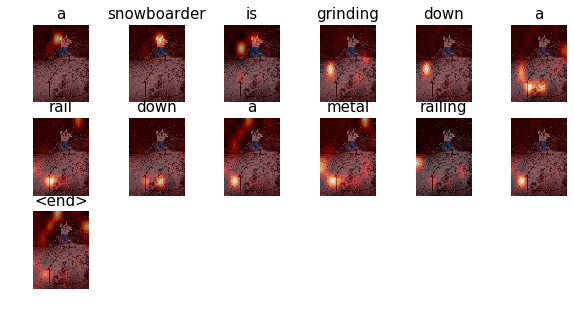

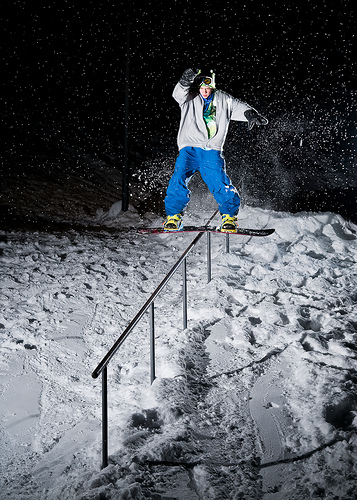

In [47]:
rid = np.random.randint(0, len(image_test))
test_image = image_test[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in caption_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25))
print(f"BELU score: {score*100}")

print('Real Caption:', real_caption)
print('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

In [48]:
# captions=beam_evaluate(test_image)
# print(captions)